In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
import random
from sklearn.decomposition import PCA

from sklearn.decomposition import PCA as sklearnPCA

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(url,header=None)

y = data[4] #classifications
X = data.iloc[:,0:4] #features

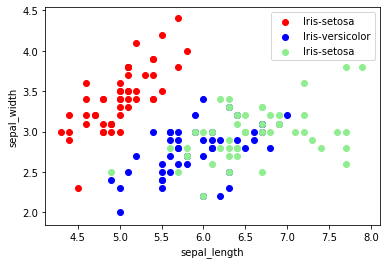

In [6]:
#three different scatter series
plt.scatter(X[y=='Iris-setosa'].iloc[:,0], X[y=='Iris-setosa'].iloc[:,1], label= 'Iris-setosa', c='red')
plt.scatter(X[y=='Iris-versicolor'].iloc[:,0], X[y=='Iris-versicolor'].iloc[:,1], label= 'Iris-versicolor', c='blue')
plt.scatter(X[y=='Iris-virginica'].iloc[:,0], X[y=='Iris-virginica'].iloc[:,1], label= 'Iris-setosa', c='lightgreen')

#prettify the graph
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

#display
plt.show()

In [7]:
X_norm = (X - X.min())/(X.max() - X.min())

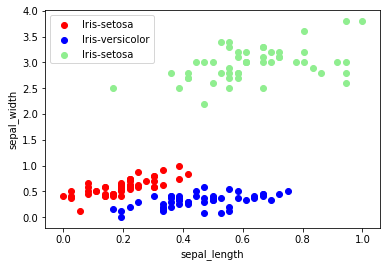

In [8]:
#three different scatter series
plt.scatter(X_norm[y=='Iris-setosa'].iloc[:,0], X_norm[y=='Iris-setosa'].iloc[:,1], label= 'Iris-setosa', c='red')
plt.scatter(X_norm[y=='Iris-versicolor'].iloc[:,0], X_norm[y=='Iris-versicolor'].iloc[:,1], label= 'Iris-versicolor', c='blue')
plt.scatter(X_norm[y=='Iris-virginica'].iloc[:,0], X[y=='Iris-virginica'].iloc[:,1], label= 'Iris-setosa', c='lightgreen')

#prettify the graph
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

#display
plt.show()

In [9]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

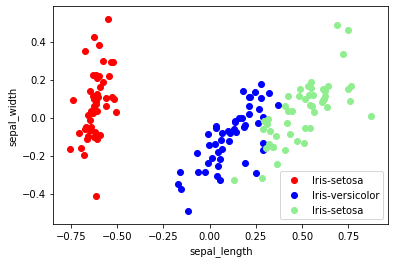

In [10]:
#three different scatter series
plt.scatter(transformed[y=='Iris-setosa'].iloc[:,0], transformed[y=='Iris-setosa'].iloc[:,1], label= 'Iris-setosa', c='red')
plt.scatter(transformed[y=='Iris-versicolor'].iloc[:,0], transformed[y=='Iris-versicolor'].iloc[:,1], label= 'Iris-versicolor', c='blue')
plt.scatter(transformed[y=='Iris-virginica'].iloc[:,0], transformed[y=='Iris-virginica'].iloc[:,1], label= 'Iris-setosa', c='lightgreen')

#prettify the graph
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

#display
plt.show()

In [48]:
from pandas.plotting import scatter_matrix

df = pd.read_csv('wine.data.csv',header=0)
df.head()

,Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [53]:
y = df['Label'] #classifications


X = df.iloc[:,1:14] #features
X = X.astype(float)

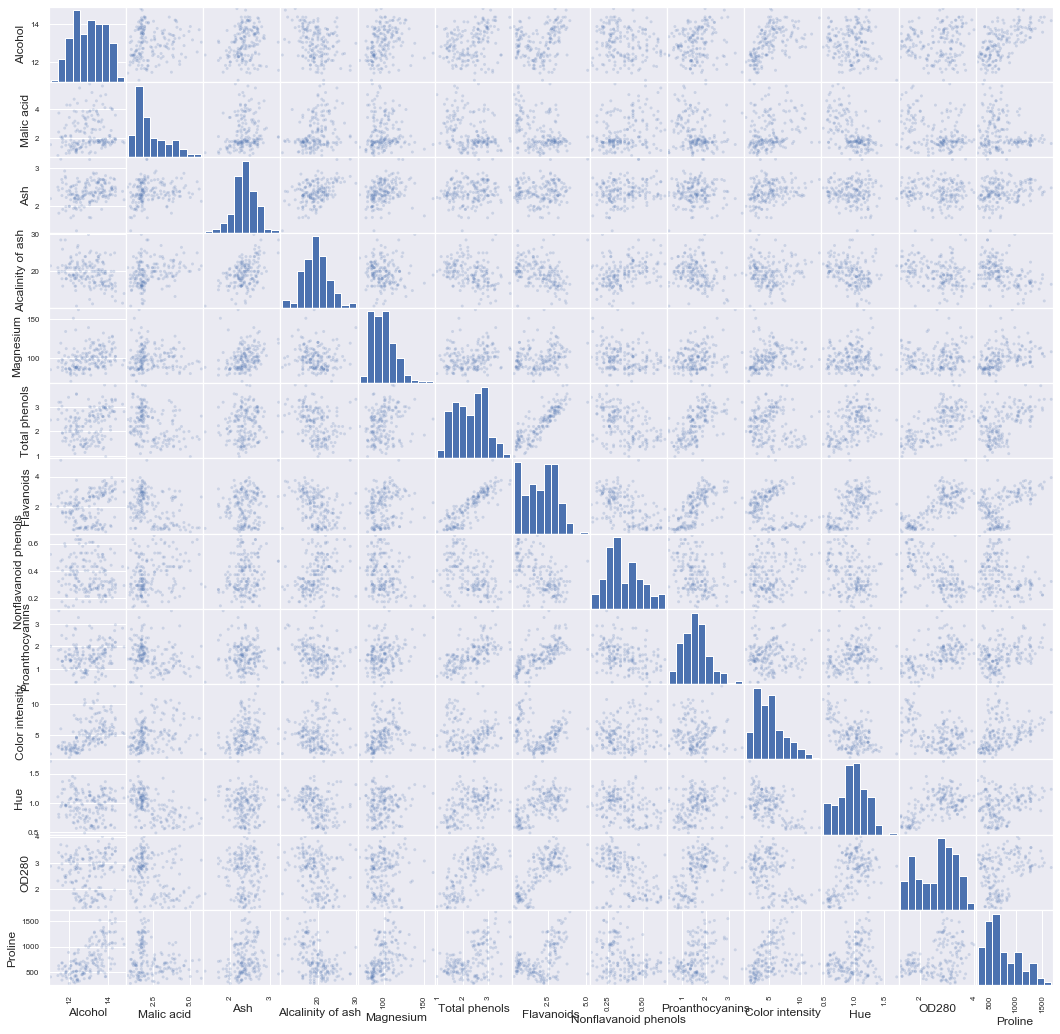

In [54]:
scatter_matrix(X, alpha=0.2, figsize=(18, 18))
plt.show()

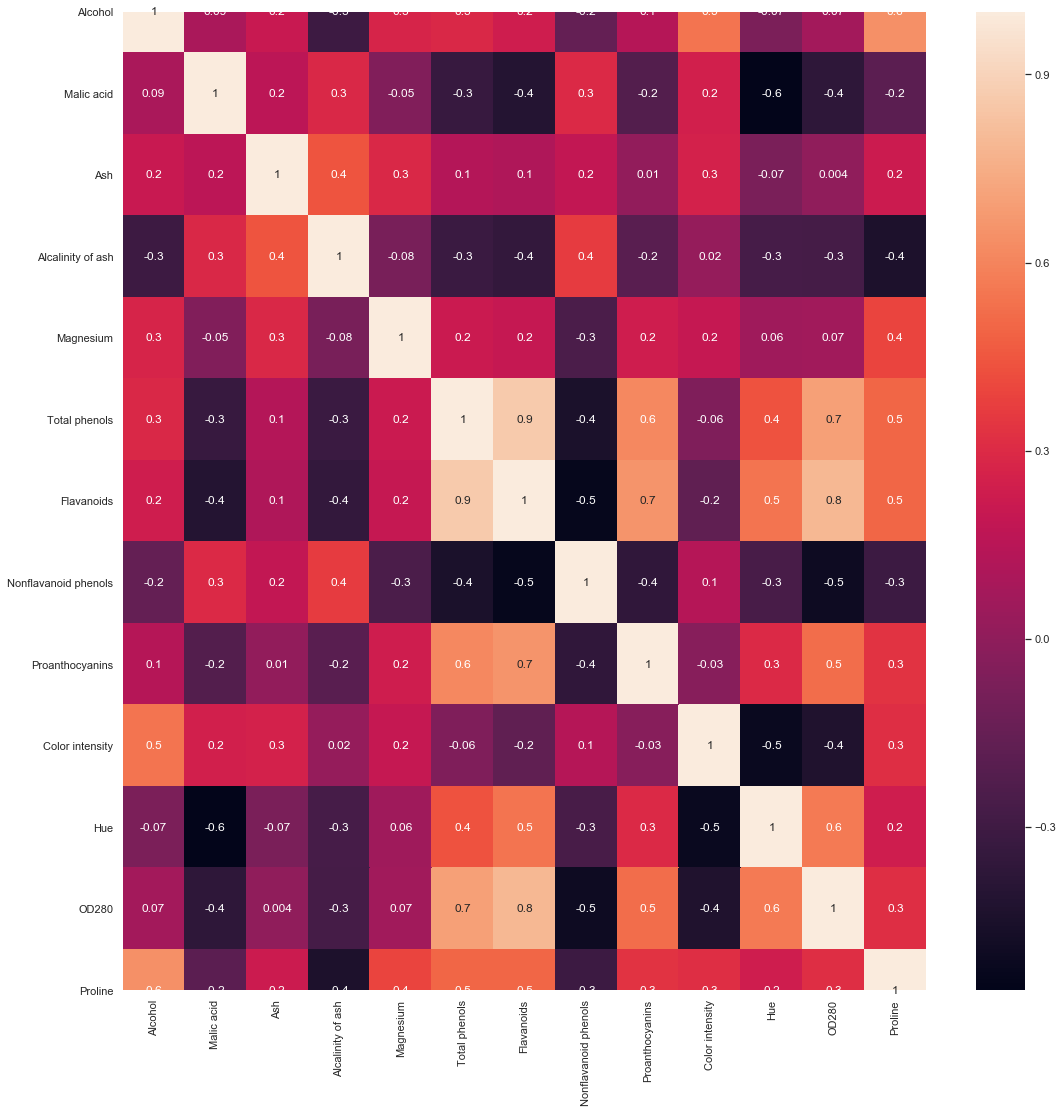

In [55]:
sns.set(rc={'figure.figsize':(18,18)})
sns.heatmap(X.corr(), annot = True, fmt='.1g')

Attributes with large correlations are:
 - Flavanoids and Total Phenols
 - Flavanoids and Proanthocyanins
 - Flavanoids and OD280
 - Proline and Alcohol
 - Total Phenols and Proanthocyanins

In [56]:
standardScaler = preprocessing.StandardScaler()
standardScaler.fit(X)
X_scaled_array = standardScaler.transform(X)
normalizedData = pd.DataFrame(X_scaled_array, columns = X.columns)
normalizedData.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


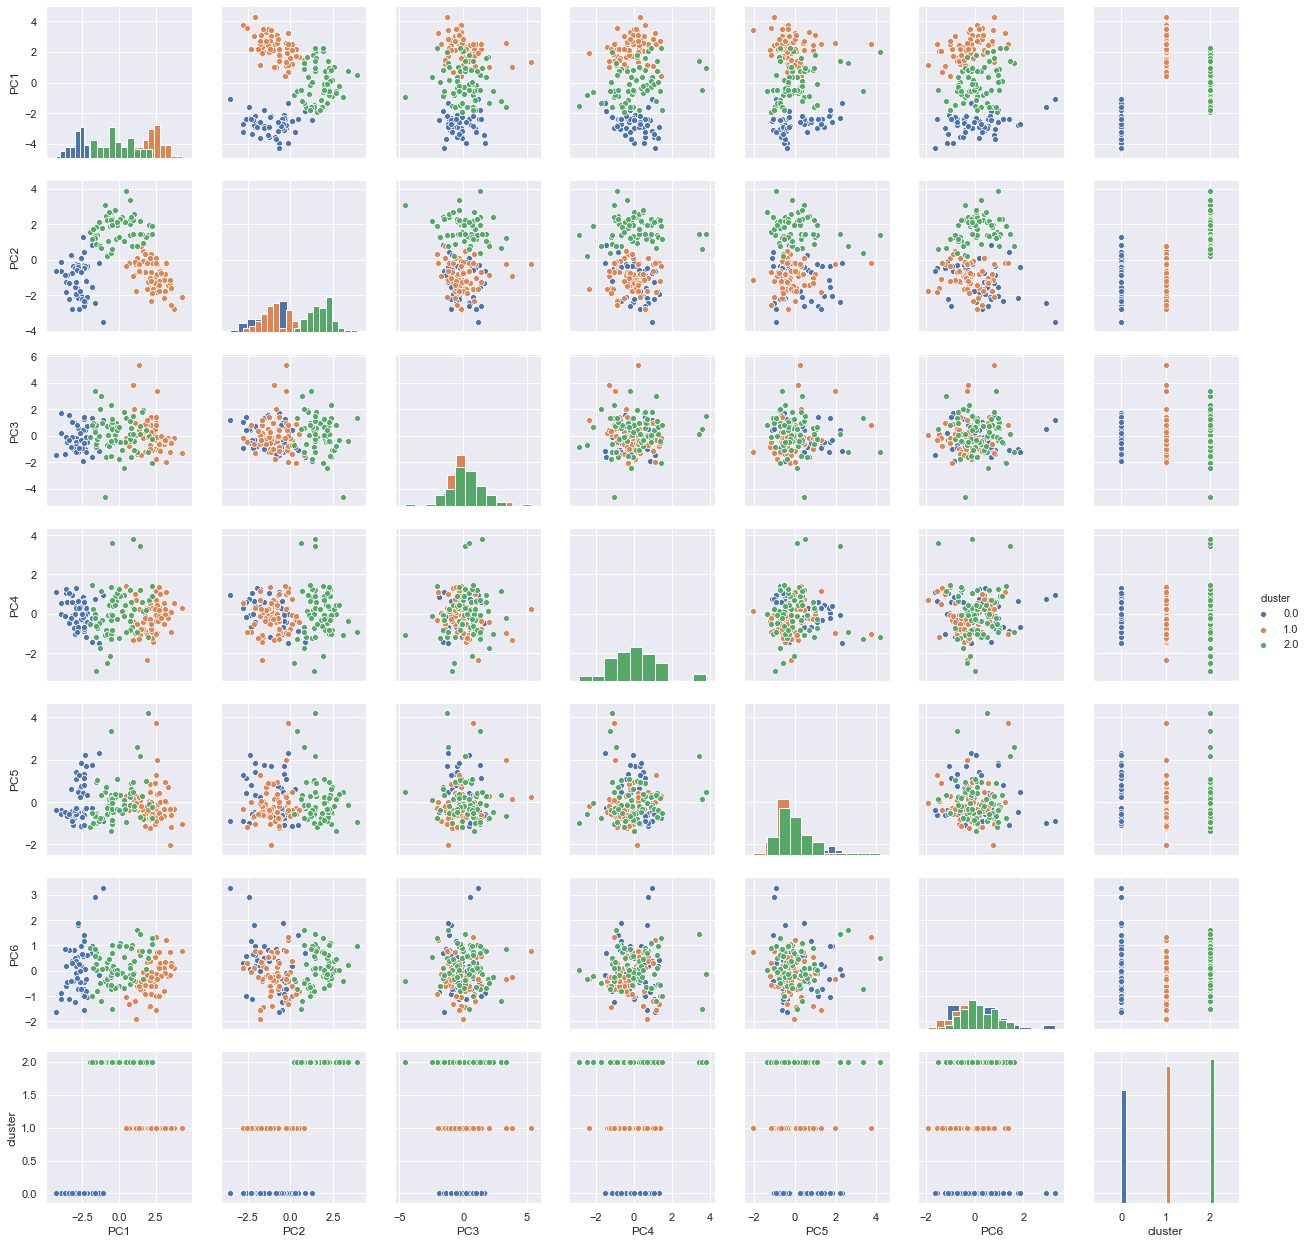

In [60]:
kMeansClustering = KMeans(n_clusters = 3, random_state=random.seed())
res0 = kMeansClustering.fit_predict(normalizedData)

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(normalizedData)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

res1 = kMeansClustering.fit_predict(principalDf)
principalDf ["cluster"] = res.astype('float64')
sns_plot = sns.pairplot(principalDf, hue = "cluster",diag_kind="hist")

In [64]:
print("Before PCA: ", adjusted_rand_score(y, res0))

print("After PCA: ", adjusted_rand_score(y, res1))


Before PCA:  0.8974949815093207
After PCA:  0.8974949815093207
